In [86]:
## Linear regression and multilenear regression  for Fish dataset to predict variables based on others and to obtain the relationship between them 
# One time with outliers and another with removing the outliers 


In [129]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale 
import seaborn as sb
from collections import Counter 


In [148]:
# Loading the data 
Fish = pd.read_csv (r'Ahmed Project\ML AHMED\Fish.csv')
Fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [149]:
Fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [150]:
Fish.describe().T


,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [151]:
%matplotlib inline 
rcParams['figure.figsize']=10,8

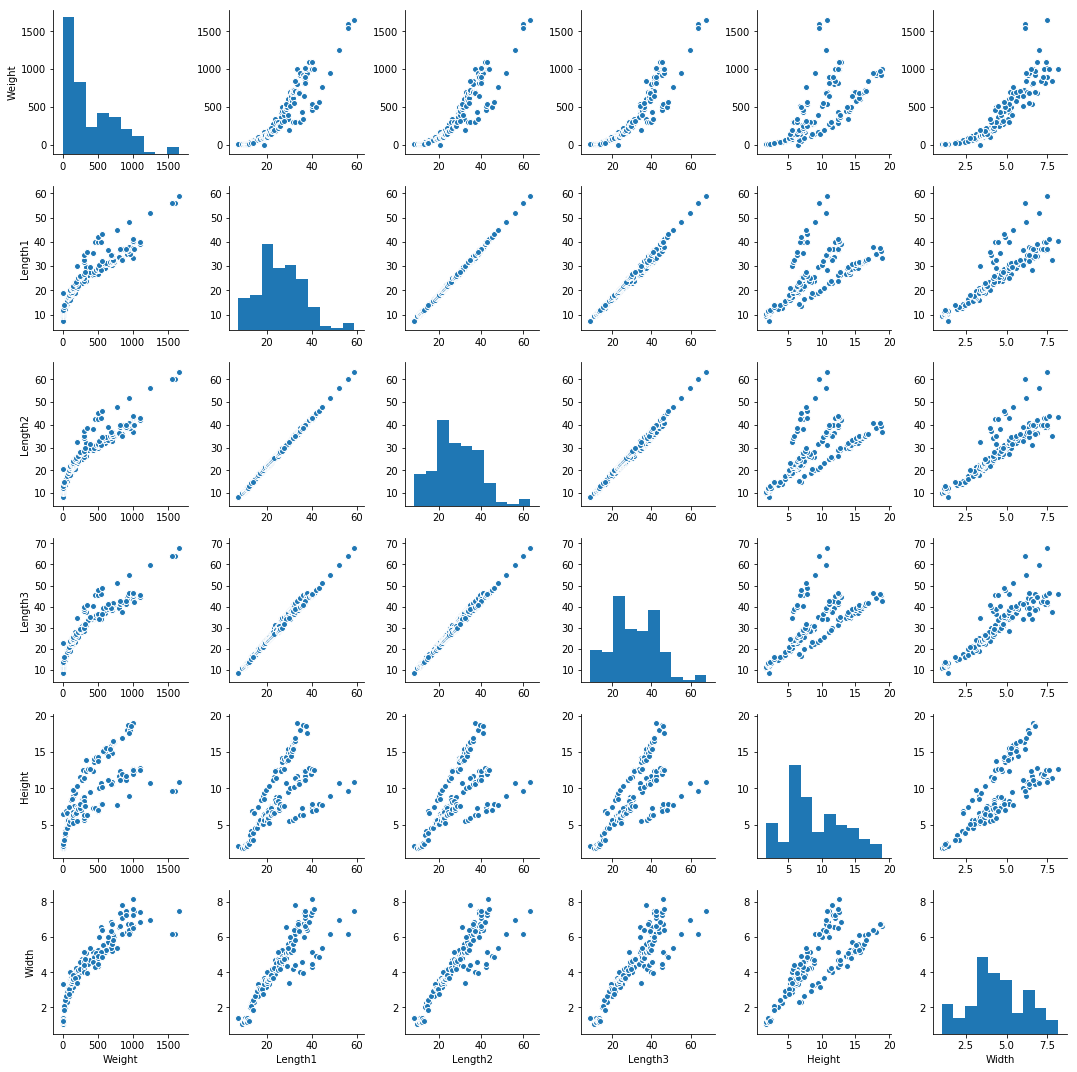

In [113]:
sb.pairplot(Fish)#, hue='Species')

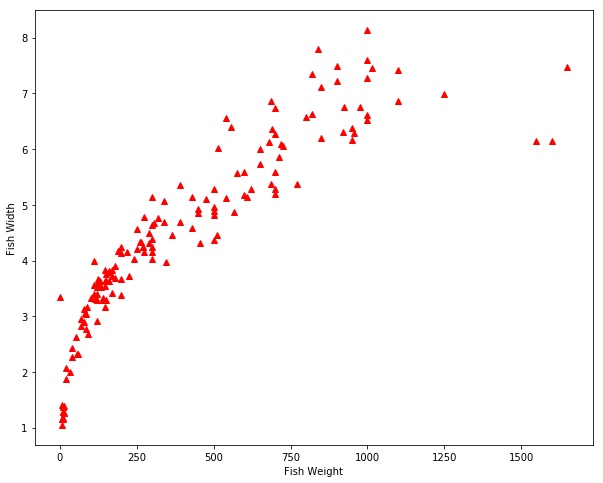

In [152]:
# plot width vs weight
plt.plot(Fish['Weight'],Fish['Width'], 'r^')
plt.xlabel('Fish Weight')
plt.ylabel('Fish Width')
plt.show()

In [153]:
# obtaining width vs weight regression with the outliers 

Weight=Fish[['Weight']].values
Width=Fish[['Width']].values
X,Y=scale(Weight),Width
LinReg= LinearRegression(normalize=True)
LinReg.fit(X,Y)
print(LinReg.intercept_,LinReg.coef_)
print(LinReg.score(X,Y))

[ 4.41748553] [[ 1.48976924]]
0.78589396114


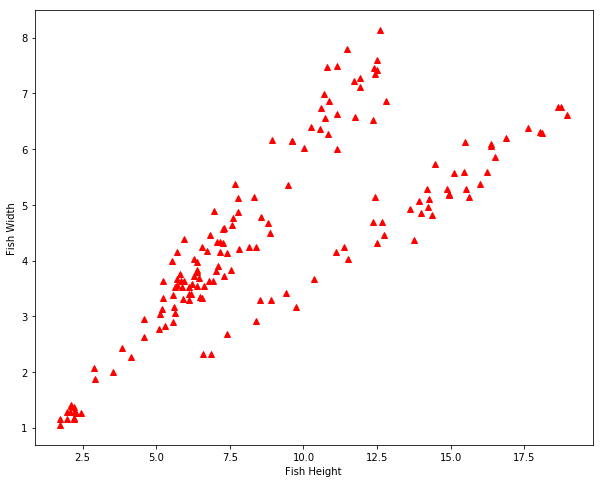

In [154]:
# Plot Height vs Width
plt.plot(Fish['Height'],Fish['Width'], 'r^')
plt.xlabel('Fish Height')
plt.ylabel('Fish Width')
plt.show()

In [155]:
# obtaining width vs Height regression with outliers 

Height=Fish[['Height']].values
Width=Fish[['Width']].values
X,Y=scale(Height),Width 
LinReg= LinearRegression(normalize=True)
LinReg.fit(X,Y)
print(LinReg.intercept_,LinReg.coef_)
print(LinReg.score(X,Y))

[ 4.41748553] [[ 1.33243198]]
0.628660307574


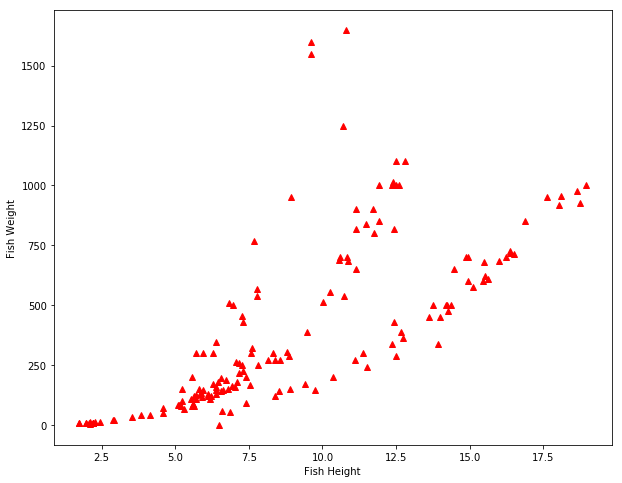

In [156]:
# Plot height vs weight

plt.plot(Fish['Height'],Fish['Weight'], 'r^')
plt.xlabel('Fish Height')
plt.ylabel('Fish Weight')
plt.show()

In [157]:
# obtaining Weight vs Height regression with outliers

Height=Fish[['Height']].values
Weight=Fish[['Weight']].values
X,Y=scale(Weight),Height
LinReg= LinearRegression(normalize=True)
LinReg.fit(X,Y)
print(LinReg.intercept_,LinReg.coef_)
print(LinReg.score(X,Y))

[ 8.97099371] [[ 3.09491588]]
0.524676155933


In [99]:
## Multi regression 

In [158]:
print(Fish.corr())

           Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547
Length3  0.923044  0.992031  0.994103  1.000000  0.703409  0.878520
Height   0.724345  0.625378  0.640441  0.703409  1.000000  0.792881
Width    0.886507  0.867050  0.873547  0.878520  0.792881  1.000000


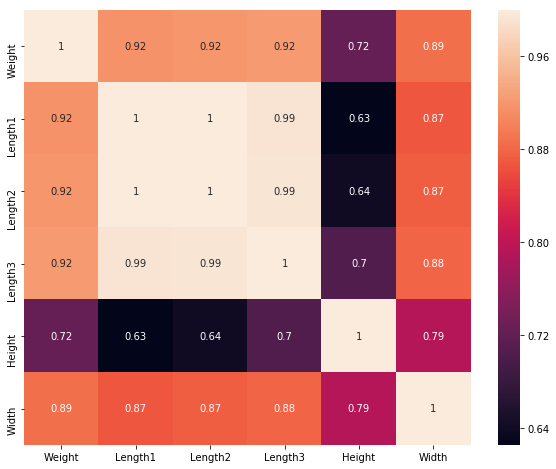

In [159]:
sb.heatmap(Fish.corr(), annot=True);


In [160]:
# Height and width have the smallest corr (multiregression)
Data=Fish[['Height','Length1']].values
Data_predict=Fish[['Weight']].values
x,y=scale(Data),scale(Data_predict)

In [161]:
null_values= x==np.NAN
x[null_values== True]

ynull_values= y==np.NAN
y[ynull_values== True]

array([], dtype=float64)

In [162]:
LinReg= LinearRegression(normalize=True)
LinReg.fit(x,y)
print(LinReg.score(x,y))

0.876311753982


In [163]:
# Redoing the test when the outliers are removed 

In [135]:
#Understanding the Species 
species_count = Fish['Species'].value_counts()
species_count = pd.DataFrame(species_count)
species_count.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


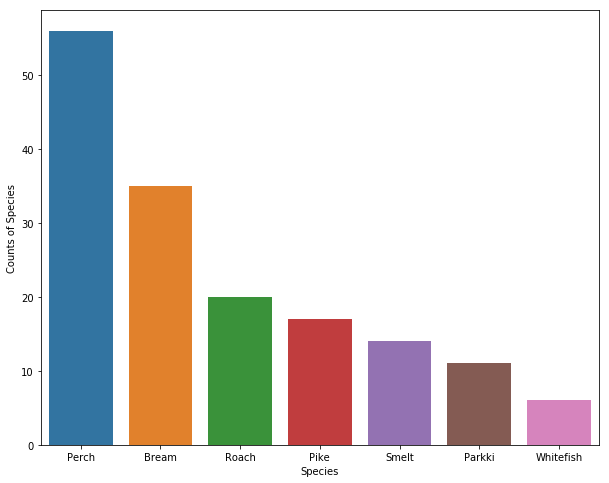

In [164]:
# Plot the Species
sb.barplot(x=species_count.index, y=species_count['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

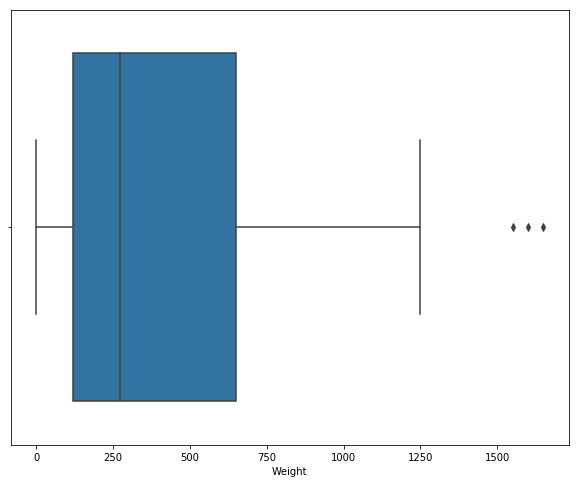

In [118]:
# Box plot to find outliers
sb.boxplot(x=Fish['Weight']);


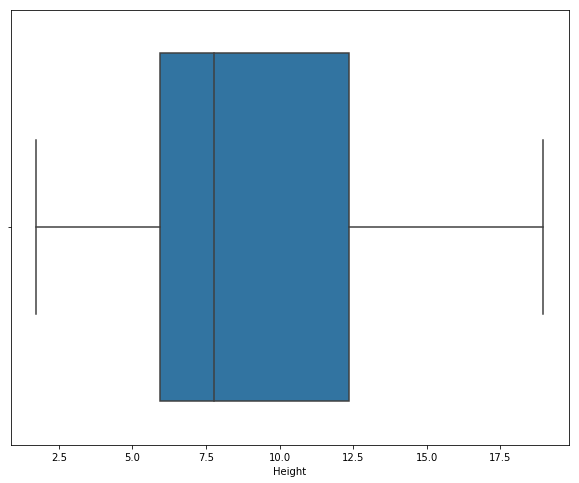

In [165]:
# Box plot to find outliers
sb.boxplot(x=Fish['Height']);


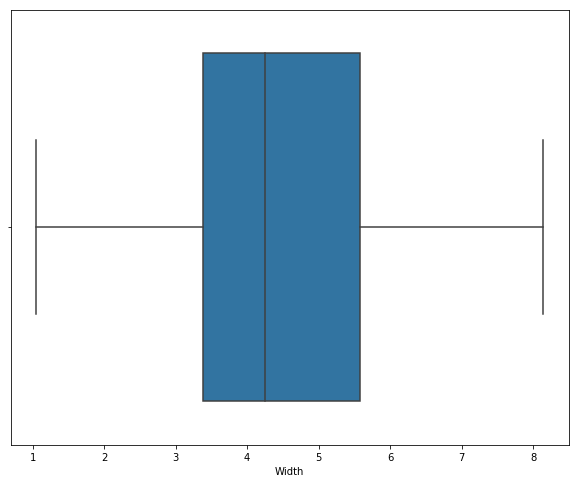

In [166]:
# Box plot to find outliers
sb.boxplot(x=Fish['Width']);


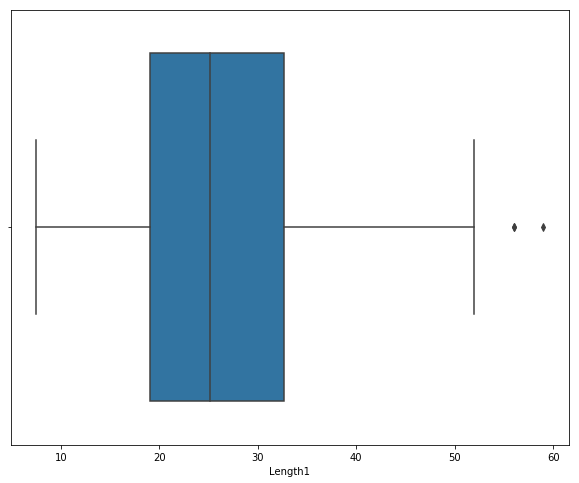

In [167]:
# Box plot to find outliers
sb.boxplot(x=Fish['Length1']);


In [136]:
# Remove weight outliers using IQR

Weight = Fish['Weight']
Weight_Q1 = Weight.quantile(0.25)
Weight_Q3 = Weight.quantile(0.75)
Weight_IQR = Weight_Q3 - Weight_Q1
Weight_lowerend = Weight_Q1 - (1.5 * Weight_IQR)
Weight_upperend = Weight_Q3 + (1.5 * Weight_IQR)
Weight_outliers = Weight[(Weight < Weight_lowerend) | (Weight > Weight_upperend)]
Weight_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [137]:
# Remove Length1 outliers using IQR

Length1 = Fish['Length1']
Length1_Q1 = Length1.quantile(0.25)
Length1_Q3 = Length1.quantile(0.75)
Length1_IQR = Length1_Q3 - Length1_Q1
Length1_lowerend = Length1_Q1 - (1.5 * Length1_IQR)
Length1_upperend = Length1_Q3 + (1.5 * Length1_IQR)
Length1_outliers = Length1[(Length1 < Length1_lowerend) | (Length1 > Length1_upperend)]
Length1_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

In [138]:
# removing the ourliers 
Fish2 = Fish.drop([142,143,144])
Fish2.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
Length1,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
Length2,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
Length3,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


In [142]:
# Height and width have the smallest corr 
Data2=Fish2[['Height','Length1']].values
Data2_predict=Fish2[['Weight']].values
x2,y2=scale(Data2),scale(Data2_predict)

In [143]:
LinReg= LinearRegression(normalize=True)
LinReg.fit(x2,y2)
print(LinReg.score(x2,y2))

# When the outliers were added we obtained a value of .876 so it went abit down when the outliers were removed 

0.873198164534


In [147]:
# obtaining Weight vs Height regression 

Height=Fish2[['Height']].values
Weight=Fish2[['Weight']].values
X,Y=scale(Weight),Height
LinReg= LinearRegression(normalize=True)
LinReg.fit(X,Y)
print(LinReg.intercept_,LinReg.coef_)
print(LinReg.score(X,Y))

# When the outliers were added we obtained a value of 0.524 so it went up when the outliers were removed 

[ 8.95112821] [[ 3.45641985]]
0.64299744654
